In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def show_img(image,title=''):
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

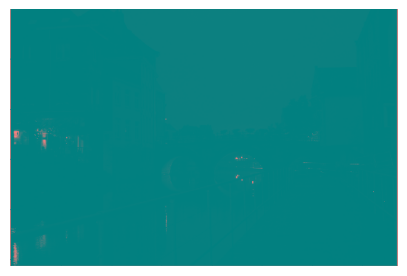

In [20]:
img = cv.imread('./img/his_img.png')
im1=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.cvtColor(img,cv.COLOR_BGR2Lab)
show_img(img)

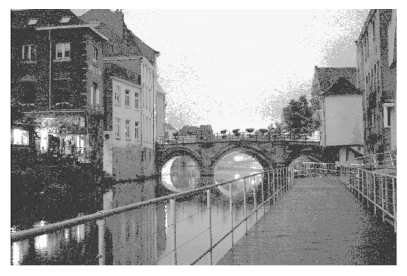

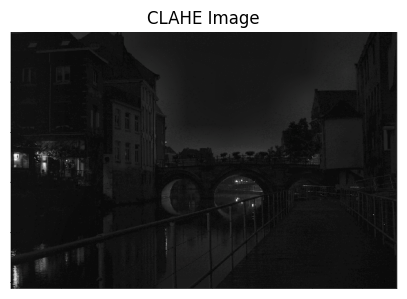

In [39]:
l, a, b = cv.split(img)

#plt.hist(l.flat, bins=100, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv.equalizeHist(l)

#plt.hist(equ.flat, bins=100, range=(0,255))
#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv.merge((equ,a,b))

#Convert LAB image back to color (RGB)
hist_eq_img = cv.cvtColor(updated_lab_img1, cv.COLOR_LAB2RGB)
show_img(hist_eq_img)
###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(10,10))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv.cvtColor(updated_lab_img2, cv.COLOR_LAB2RGB)


# show_img(img,"Original image")
# show_img(hist_eq_img,"Equalized image")
show_img(CLAHE_img,'CLAHE Image')

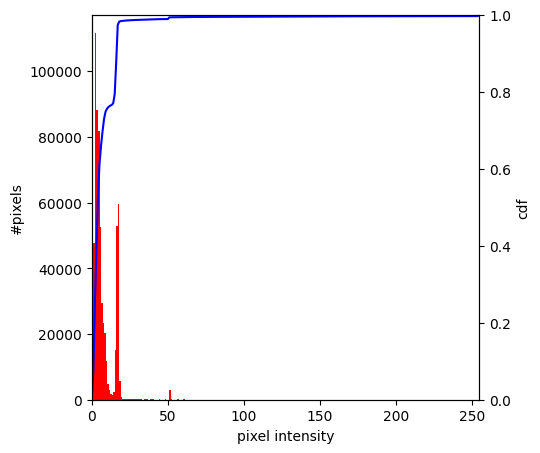

In [42]:
hist, bins = np.histogram(im1.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(im1.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

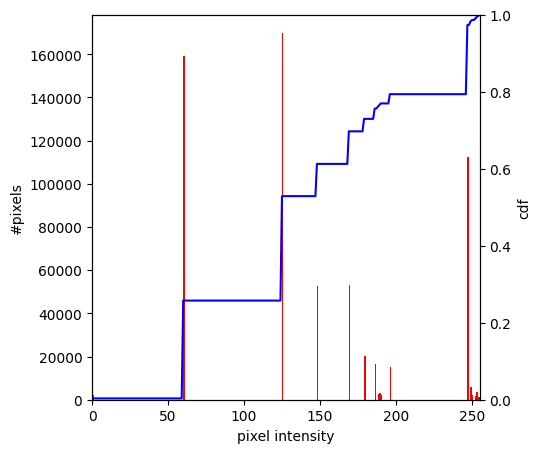

In [43]:
hist, bins = np.histogram(hist_eq_img.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(hist_eq_img.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

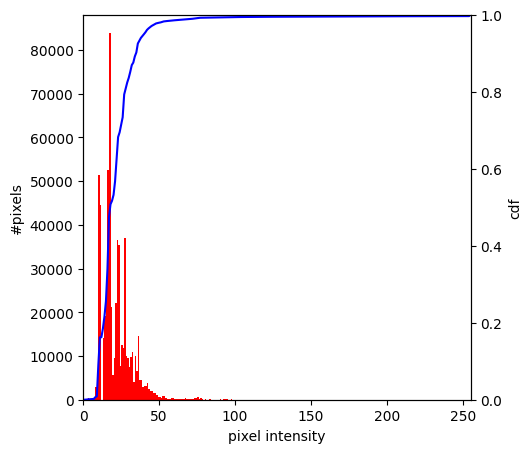

In [40]:
hist, bins = np.histogram(CLAHE_img.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(CLAHE_img.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()